<a href="https://colab.research.google.com/github/biranchi2018/CoronaRegression/blob/master/Corona_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

import tensorflow as tf
import numpy as np

In [2]:

data = np.array([38.03, 42.10, 44.04, 45.01, 47.25, 49.69, 52.19, 53.38, 56.50, 58.47, 59.32, 60.74, 61.09, 62.40, 63.22, 64.36, 65.52, 66.82])
#data = np.array([38.03, 42.10, 44.04, 45.01, 47.25, 49.69, 52.19, 53.38, 56.50, 58.47, 59.32, 60.74, 61.09])

data

array([38.03, 42.1 , 44.04, 45.01, 47.25, 49.69, 52.19, 53.38, 56.5 ,
       58.47, 59.32, 60.74, 61.09, 62.4 , 63.22, 64.36, 65.52, 66.82])

In [3]:
len(data)

18

## Prepare data for LSTM 

In [0]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [0]:
n_steps = 3
n_features = 1

xs, ys = split_sequence(data, n_steps)

In [6]:
xs, ys

(array([[38.03, 42.1 , 44.04],
        [42.1 , 44.04, 45.01],
        [44.04, 45.01, 47.25],
        [45.01, 47.25, 49.69],
        [47.25, 49.69, 52.19],
        [49.69, 52.19, 53.38],
        [52.19, 53.38, 56.5 ],
        [53.38, 56.5 , 58.47],
        [56.5 , 58.47, 59.32],
        [58.47, 59.32, 60.74],
        [59.32, 60.74, 61.09],
        [60.74, 61.09, 62.4 ],
        [61.09, 62.4 , 63.22],
        [62.4 , 63.22, 64.36],
        [63.22, 64.36, 65.52]]),
 array([45.01, 47.25, 49.69, 52.19, 53.38, 56.5 , 58.47, 59.32, 60.74,
        61.09, 62.4 , 63.22, 64.36, 65.52, 66.82]))

In [0]:
# xs = []
# xs_range = range(0,len(ys))
# print(xs_range)
# for i in xs_range:
#   xs.append(i+1)

# xs = np.array(xs, dtype=np.float32)
# xs

In [0]:
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(100, input_dim=1, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.2))
# model.add(tf.keras.layers.Dense(100, activation='relu'))
# model.add(tf.keras.layers.Dense(10, activation='relu'))
# model.add(tf.keras.layers.Dense(1))
# model.summary()

In [9]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, input_shape=(n_steps, n_features), activation='relu', return_sequences=True)))
model.add(tf.keras.layers.LSTM(100, activation='relu', return_sequences=True))
model.add(tf.keras.layers.LSTM(100, activation='relu'))
model.add(tf.keras.layers.Dense(1))
# model.summary()

In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_loss') < 1e-5):
      print("\nReached val_loss < 1e-5 cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [0]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch/20))

In [0]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9)
rmsprop_optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-6, momentum=0.9)
adam_optimizer = tf.keras.optimizers.Adam(lr=1e-6)

In [0]:
model.compile(loss='mse', optimizer=adam_optimizer, metrics=['mae'])
# model.compile(loss='mse', optimizer='sgd', metrics=['mse'])
# model.compile(loss = 'mse', optimizer='sgd' , metrics = ['mse'])

In [14]:
xs.shape

(15, 3)

In [0]:
xs = xs.reshape(-1,1,1)

In [16]:
xs.shape , xs.ndim

((45, 1, 1), 3)

In [17]:
ys.shape , ys.ndim

((15,), 1)

In [18]:
history = model.fit(xs, ys, validation_split=0.2, epochs=2000, callbacks=[callbacks, lr_schedule], verbose=0) 


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [0]:
# xs_next = np.max(xs)+1
# xs_next = np.array([xs_next])
# xs_next

In [0]:
# xs_next = xs_next.reshape(-1,1,1)

In [0]:
# x_test = np.array([9.0])
# x_test

In [0]:
# 63.22, 64.36, 65.52, 66.82

xs_next = np.array([63.22, 64.36, 65.52])
xs_next = xs_next.reshape((1, n_steps, n_features))

In [23]:
x_test = xs_next
print(f'x_test : {x_test}')
pred = model.predict(x_test, verbose=0)[0][0]
print(f'pred: {pred}')

x_test : [[[63.22]
  [64.36]
  [65.52]]]
pred: nan


In [24]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae', 'lr'])

In [25]:
type(history.history.keys())

dict_keys

In [26]:
keys = list(history.history.keys())
keys

['loss', 'mae', 'val_loss', 'val_mae', 'lr']

In [0]:
# tr_epochs = range(len(history.history['loss']))
# tr_epochs

In [0]:
# val_epochs = range(len(history.history['mse']))
# val_epochs

In [0]:
train_loss = history.history[keys[0]]
train_mse = history.history[keys[1]]
val_loss = history.history[keys[2]]
val_mse = history.history[keys[3]]

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

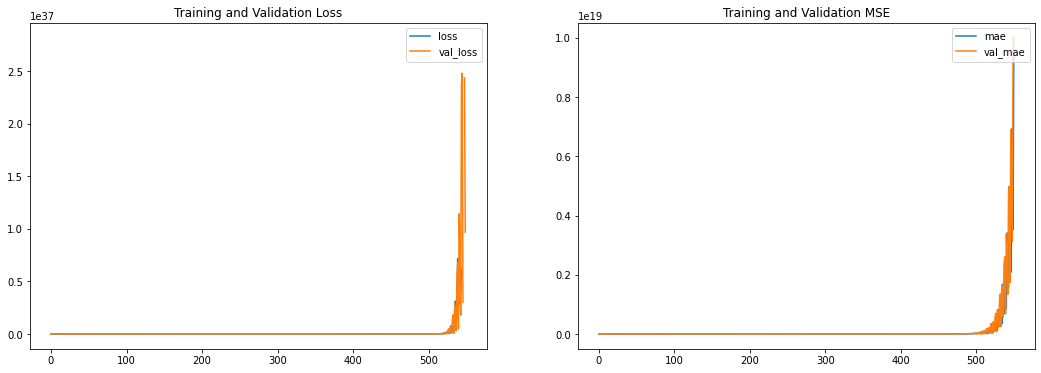

In [31]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.plot(range(len(train_loss)), train_loss, label=keys[0])
plt.plot(range(len(val_loss)), val_loss, label=keys[2])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.subplot(122)
plt.plot(range(len(train_mse)), train_mse, label=keys[1])
plt.plot(range(len(val_mse)), val_mse, label=keys[3])
plt.legend(loc='upper right')
plt.title('Training and Validation MSE')

plt.show()